#

#Import Library

In [3]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

#Loading Data


###Dataset Description

Dataset contains 157 individuals with the following attributes :

In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# %cd /content/gdrive/MyDrive/

#Download Dataset From Kaggle


In [6]:
# ! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)

In [7]:
# from google.colab import files
# files.upload() #upload kaggle.json

# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json

# !kaggle kernels list — user  — sort-by dateRun

# !kaggle competitions download -c DATASET

# !unzip -q train.csv.zip -d .
# !unzip -q test.csv.zip -d .
# !ls

In [8]:
# from google.colab import files
# files.upload() #upload kaggle.json


# # Change file permission
# ! chmod 600 kaggle.json 
# # Check or make kaggle folder
# ! (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle)
# # Move kaggle.json to kaggle folder
# ! mv kaggle.json ~/.kaggle/ && echo 'Done'
# # Download dataset from kaggle
# ! kaggle datasets download -d heal-yourself-mental-health-prediction-2022

# # unzipping/extract data .zip
# # file_zip = 'early-stage-symptoms-of-covid19-patients.zip'
# # with zipfile.ZipFile(file_zip) as zip_file:
# #     zip_file.extractall('./sars-cov-2/')
# file_zip = 'heal-yourself-mental-health-prediction-2022.zip'
# zip_ref = zipfile.ZipFile(file_zip, 'r')
# zip_ref.extractall('./mental-health/')
# zip_ref.close()
# print(os.listdir('./mental-health/'))


# #kaggle kernels output sureddyakshay/heal-yourself-mental-health-prediction-2022 -p /path/to/dest

#Download Dataset From Google Drive

In [9]:
url = 'https://drive.google.com/file/d/1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ/view?usp=sharing'

In [10]:
# fluff, id = url.split('d/')
id = url.split('d/')[1].split('/view?')[0]
print (id)

1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ


In [11]:
# Use this to download easily (only on google colab)
!gdown --id 1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ
To: /content/Mental Health Questionnaire 2.0.csv
100% 43.2k/43.2k [00:00<00:00, 34.2MB/s]


In [12]:
# df = pd.read_csv(url)
# df.head()

#Download Data Locally

In [13]:
#url = 'https://drive.google.com/file/d/1rroo8QFnRiLr8is_hQXiJWKTuB3swTBQ/view?usp=sharing'
df = pd.read_csv('Mental Health Questionnaire 2.0.csv')

#Explore Dataset


In [14]:
df.head(10)

,Timestamp,Email address,Name,Gender,Are you above 30 years of age?,Employment Status,City,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,09-12-2021 23:54,riyaaditi2@gmail.com,Aditi Harsh,Female,No,Student,Tier 3 (Other cities/towns),Fine,Yes,No,...,No,No,NaN,NaN,NaN,NaN,NaN,NaN,36,Yes
1,10-12-2021 08:40,imcrazyashutosh@gmail.com,Ashutosh Kumar,Male,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Fine,No,Yes,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,33,No
2,10-12-2021 21:48,atharv23srivastava@gmail.com,Atharv srivastava,Male,No,Student,"Tier 1 (Delhi, Mumbai, Bangalore, Chennai, Kol...",Fine,No,Maybe,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,NaN,34,No
3,10-12-2021 21:50,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,NaN,35,Yes
4,10-12-2021 21:55,nisha18054@gmail.com,Jaya singh,Female,No,Student,Tier 2 (Capital cities Eg. Lucknow ),Good,Yes,No,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,NaN,33,No
5,10-12-2021 21:58,ritulricha22@gmail.com,Rimi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,Maybe,...,Yes,Yes,2-5 hours,4.0,Yes,Sometimes,4.0,NaN,36,Yes
6,10-12-2021 21:58,yushraubaid67@gmail.com,Yushra,Female,No,Student,Tier 3 (Other cities/towns),Sad,No,Maybe,...,No,Yes,2-5 hours,1.0,No,Very often,4.0,NaN,37,Yes
7,10-12-2021 21:59,shaheenultimatekhan@gmail.com,Aaisha,Female,No,Student,Tier 3 (Other cities/towns),Sad,Maybe,Yes,...,Yes,Maybe,5-10 hours,1.0,Not sure,Very often,3.0,NaN,37,Yes
8,10-12-2021 22:04,babitasingh1323@gmail.com,Samridhi,Female,No,Student,Tier 3 (Other cities/towns),Fine,No,No,...,Yes,Yes,2-5 hours,1.0,Yes,Very often,3.0,NaN,38,Yes
9,10-12-2021 22:05,24shreyasrivastava@gmail.com,Shreya Srivastava,Female,No,Unemployed,Tier 3 (Other cities/towns),Fine,No,Yes,...,Yes,No,2-5 hours,3.0,Yes,Very often,3.0,NaN,36,Yes


In [15]:
df.describe()

,How confident you have been feeling in your capabilities recently.,"If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction
count,158.000000,150.000000,155.000000,116.000000,158.000000
mean,3.417722,2.206667,2.929032,3.956897,34.879747
std,1.216737,1.401326,1.339266,1.189755,4.211536
min,1.000000,1.000000,1.000000,1.000000,26.000000
25%,3.000000,1.000000,2.000000,3.000000,32.000000
50%,3.500000,1.500000,3.000000,4.000000,35.000000
75%,4.000000,3.000000,4.000000,5.000000,38.000000
max,5.000000,5.000000,5.000000,5.000000,45.000000


###Check for empty atributes


In [16]:
df.isna().sum()

Timestamp                                                                                                                0
Email address                                                                                                            0
Name                                                                                                                     0
Gender                                                                                                                   0
Are you above 30 years of age?                                                                                           0
Employment Status                                                                                                        0
City                                                                                                                     0
How are you feeling today?                                                                                               0
eating and sleep

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             158 non-null    object 
 1   Email address                                                                                                         158 non-null    object 
 2   Name                                                                                                                  158 non-null    object 
 3   Gender                                                                                                                158 non-null    object 
 4   Are you 

In [18]:
#Check Number of rows and columns
print('Row: ', df.shape[0])
print('Columns: ', df.shape[1])

Row:  158
Columns:  32


#Checking For Duplicate and Imbalance Data

In [19]:
print("Duplicated Data: ", df.duplicated().sum())

Duplicated Data:  0


In [20]:
import seaborn as sad

# sns.countplot(df)
# print(df.value_counts())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


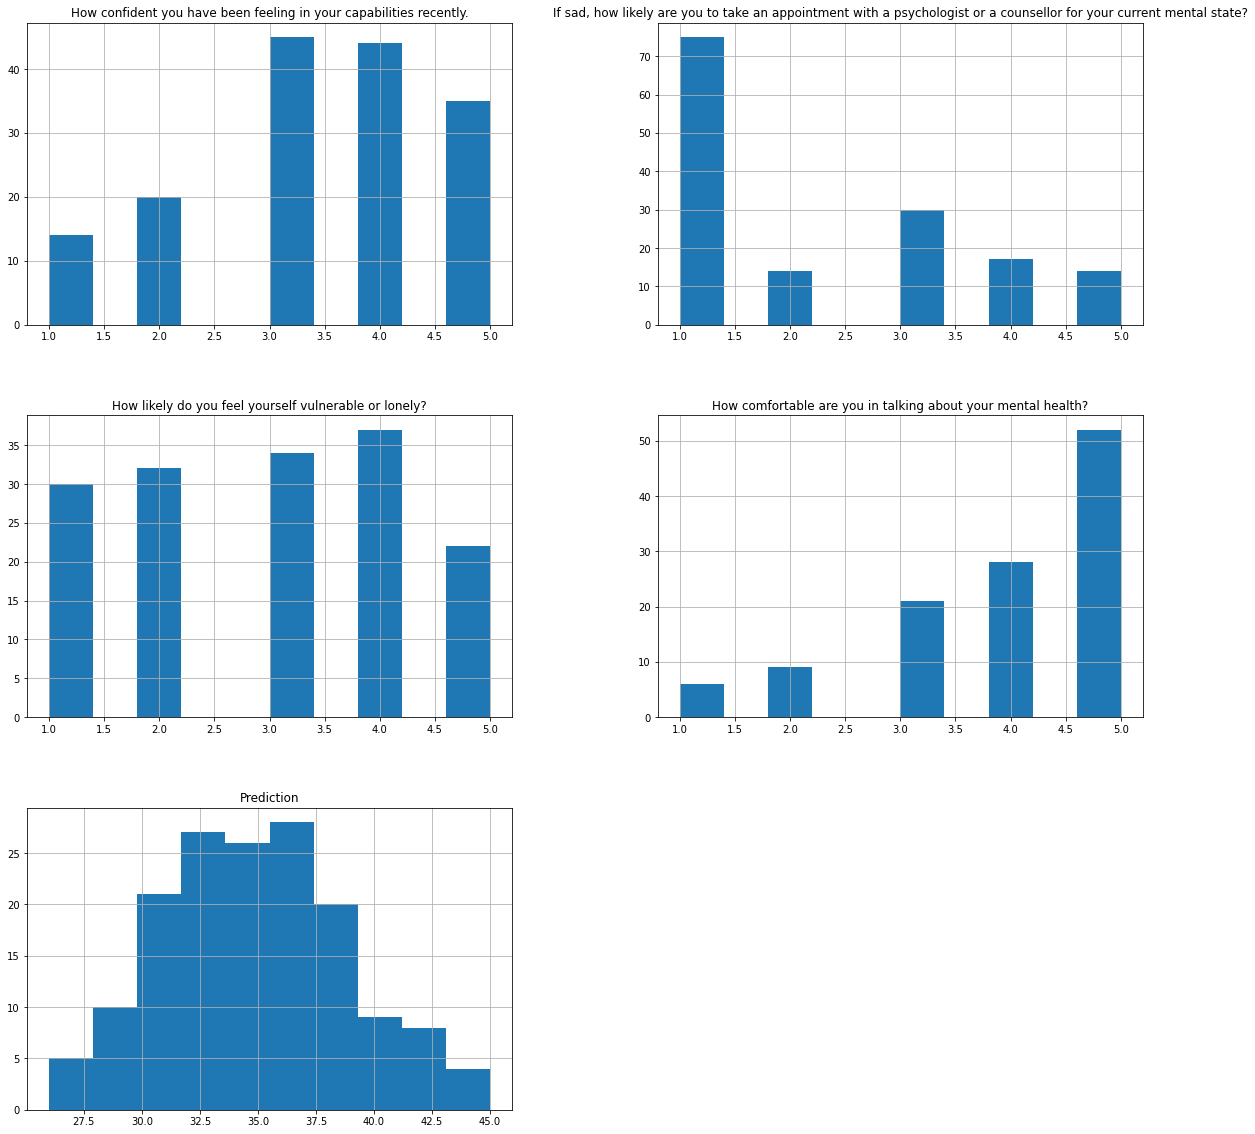

In [21]:
fig = plt.figure(figsize=(20, 20))
axs = fig.add_subplot()
df.hist(ax=axs);

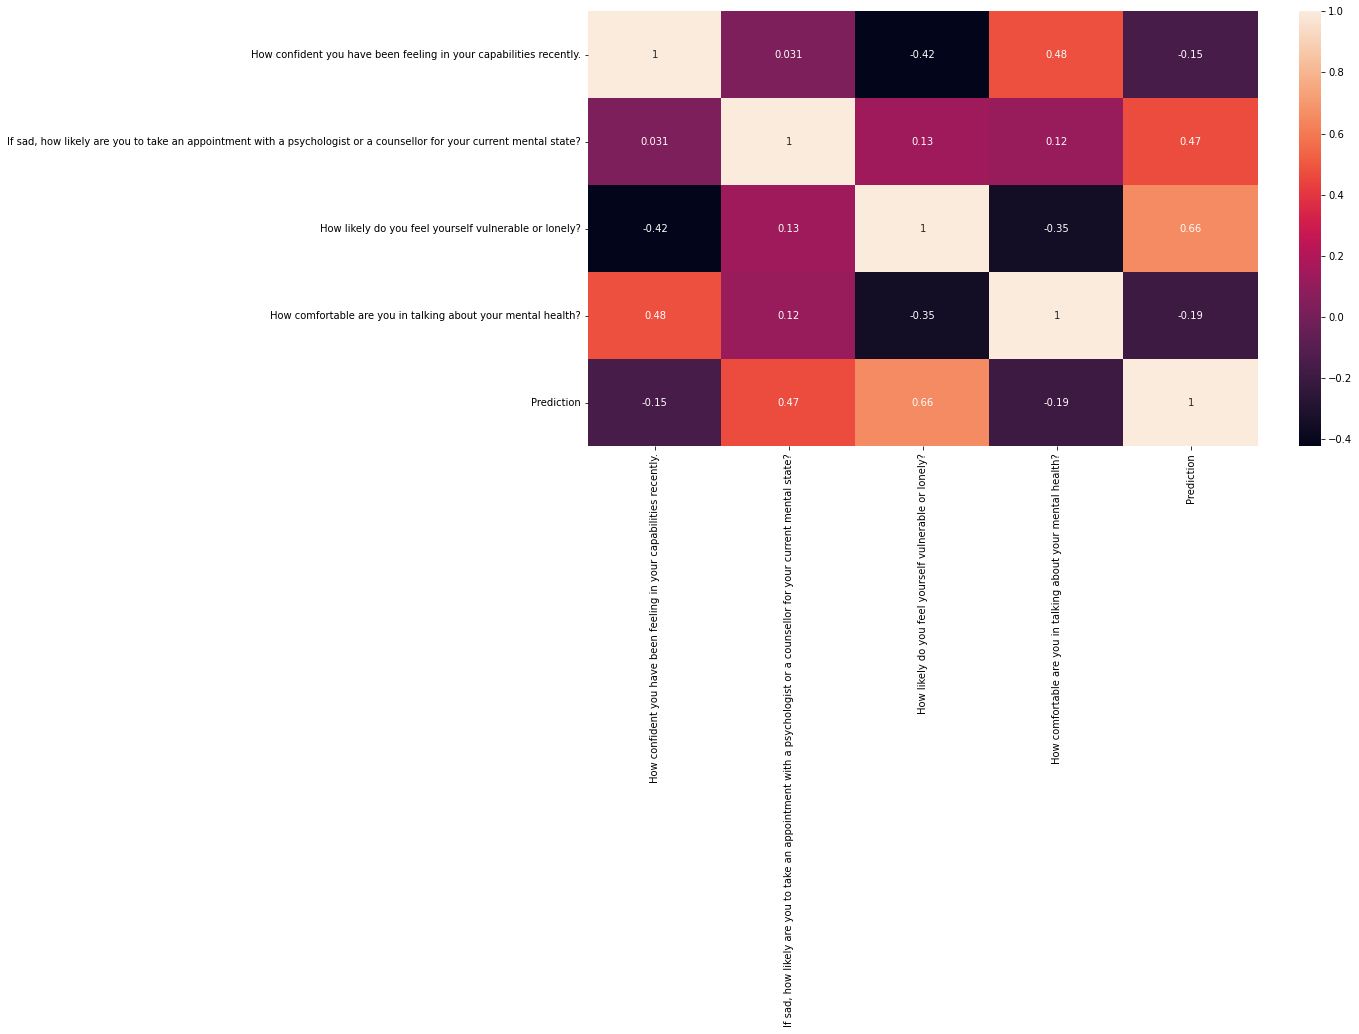

In [22]:
import seaborn as sns
plt.figure(figsize=(15,8)) 
sns.heatmap(df.corr(), annot=True)

#Preprocessing

---
data cleaning


##FIlling Empty Atributes with most appearing data

In [23]:
df['How likely do you feel yourself vulnerable or lonely?'].unique()

array([nan,  2.,  4.,  3.,  1.,  5.])

In [24]:
df['How likely do you feel yourself vulnerable or lonely?'].mode()

0    4.0
dtype: float64

In [25]:
df['How likely do you feel yourself vulnerable or lonely?'] = df['How likely do you feel yourself vulnerable or lonely?'].fillna(4.0)

In [26]:
df['How often do you get offended or angry or start crying ?'].mode()

0    Sometimes
dtype: object

In [27]:
df['How often do you get offended or angry or start crying ?'] = df['How often do you get offended or angry or start crying ?'].fillna('Sometimes')

In [28]:
df['Has the COVID-19 pandemic affected your mental well being?'].unique()

array([nan, 'Yes', 'Not sure', 'No'], dtype=object)

In [29]:
df['Has the COVID-19 pandemic affected your mental well being?'].mode()

0    Yes
dtype: object

In [30]:
df['Has the COVID-19 pandemic affected your mental well being?'] = df['Has the COVID-19 pandemic affected your mental well being?'].fillna('Yes')

In [31]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].unique()

array([nan, 'More than 10 hours', '2-5 hours', '5-10 hours', '1-2 hours'],
      dtype=object)

In [32]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].mode()

0    2-5 hours
dtype: object

In [33]:
df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'] = df['How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?'].fillna('2-5 hours')

In [34]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].unique()

array([nan,  1.,  4.,  3.,  2.,  5.])

In [35]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].mode()

0    1.0
dtype: float64

In [36]:
df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'] = df['If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?'].fillna(1.0)

In [37]:
df['(If sad)have you been in the same mental state for the past few days?'].unique()

array(['No', 'Yes', 'Maybe', nan], dtype=object)

In [38]:
df['(If sad)have you been in the same mental state for the past few days?'].mode()

0    No
dtype: object

In [39]:
df['(If sad)have you been in the same mental state for the past few days?']=df['(If sad)have you been in the same mental state for the past few days?'].fillna('No')

In [40]:
df['Have you taken any therapy or medication in the near past for mental health?'].unique()

array(['No', 'Maybe', 'Yes', nan], dtype=object)

In [41]:
df['Have you taken any therapy or medication in the near past for mental health?'].mode()

0    No
dtype: object

In [42]:
df['Have you taken any therapy or medication in the near past for mental health?'] = df['Have you taken any therapy or medication in the near past for mental health?'].fillna('No')

In [43]:
df['How comfortable are you in talking about your mental health?'].unique()

array([nan,  1.,  4.,  2.,  5.,  3.])

In [44]:
df['How comfortable are you in talking about your mental health?'].mode()

0    5.0
dtype: float64

In [45]:
df['How comfortable are you in talking about your mental health?']=df['How comfortable are you in talking about your mental health?'].fillna(5.0)

In [46]:
df['At what time of the day are you extremely low?'].unique()

array(['Evening', 'Morning', 'Afternoon'], dtype=object)

In [47]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].unique()

array(['No', 'Yes', 'Maybe', nan], dtype=object)

In [48]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].mode()

0    No
dtype: object

In [49]:
df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'] = df['Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?'].fillna('No')

In [50]:
df.isna().sum()

Timestamp                                                                                                               0
Email address                                                                                                           0
Name                                                                                                                    0
Gender                                                                                                                  0
Are you above 30 years of age?                                                                                          0
Employment Status                                                                                                       0
City                                                                                                                    0
How are you feeling today?                                                                                              0
eating and sleeping     

In [51]:
dfnorm = df

####Drop Unused Column

In [52]:
dfnorm = dfnorm.drop(['Timestamp','Name','Email address','City'],axis = 1)

In [53]:
dfnorm.head()

,Gender,Are you above 30 years of age?,Employment Status,How are you feeling today?,eating and sleeping,(If sad)have you been in the same mental state for the past few days?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,Has there been a sudden and huge change in your life?,Your stress is related to which of the following areas?,...,"Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?",Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?,"How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?","If sad, how likely are you to take an appointment with a psychologist or a counsellor for your current mental state?",Has the COVID-19 pandemic affected your mental well being?,How often do you get offended or angry or start crying ?,How likely do you feel yourself vulnerable or lonely?,How comfortable are you in talking about your mental health?,Prediction,Prediction_status
0,Female,No,Student,Fine,Yes,No,For some time,Evening,No,Personal,...,No,No,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,36,Yes
1,Male,No,Student,Fine,No,Yes,For some time,Morning,Yes,Personal,...,Yes,Yes,2-5 hours,1.0,Yes,Sometimes,4.0,5.0,33,No
2,Male,No,Student,Fine,No,Maybe,Significant time,Evening,No,Personal,...,Maybe,Maybe,More than 10 hours,1.0,Yes,Sometimes,2.0,5.0,34,No
3,Female,No,Student,Fine,No,Maybe,Significant time,Evening,Not sure,"Home, Work, Personal",...,Yes,Yes,2-5 hours,1.0,Yes,Often,4.0,5.0,35,Yes
4,Female,No,Student,Good,Yes,No,Not sad,Afternoon,Yes,Personal,...,No,No,5-10 hours,1.0,Not sure,Sometimes,4.0,5.0,33,No


##Labeling




---



In [54]:
#Labeling for Gender
def gender_labelizing(gender):
  if gender == 'Male':
    return 0
  elif gender =='Female':
    return 1
  else:
    return 2

dfnorm['Gender'] = dfnorm['Gender'].apply(gender_labelizing)

###Show Gender Column

In [55]:
dfnorm['Gender']

0      1
1      0
2      0
3      1
4      1
      ..
153    0
154    0
155    2
156    0
157    1
Name: Gender, Length: 158, dtype: int64

In [56]:
target='Prediction_status'
binary_features=[
    'Are you above 30 years of age?'
]
ordinal_features=[
    'How are you feeling today?',
    'Is your sadness momentarily or has it been constant for a long time?',
    'At what time of the day are you extremely low?',
    'How frequently have you had little pleasure or interest in the activities you usually enjoy?',
    'Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.',
    'How frequently have you been doing things that mean something to you or your life?',
    'How easy is it for you to take medical leave for a mental health condition?',
    'How often do you make use of substance abuse(e.g. smoking, alcohol)?',
    'How many hours do you spend per day on watching mobile phone, laptop, computer, television, etc.?',
    'How often do you get offended or angry or start crying ?'
]
     
nominal_features=[
    'eating and sleeping',
    '(If sad)have you been in the same mental state for the past few days?',
    'Has there been a sudden and huge change in your life?',
    'Your stress is related to which of the following areas?',
    'If you have a mental health condition, do you feel that it interferes with your work?',
    'Have you taken any therapy or medication in the near past for mental health?',
    'Having trouble concentrating on things, such as reading the newspaper or watching television, or studying?',
    'Do you feel bad about yourself — or that you are a failure or have let yourself or your family down?',
    'Has the COVID-19 pandemic affected your mental well being?'
]

In [57]:
# def binary_labelizing(dflabel, columns, values):
#     for column,positive_value in zip(columns,values):
#         df[column]=df[column].apply(lambda x: 1 if x==values else 0)
#     return dfnorm

In [58]:
def binary_encode(dflabel,columns,positive_values):
    for column,positive_value in zip(columns,positive_values):
        dflabel[column]=dflabel[column].apply(lambda x: 1 if x==positive_value else 0)
    return dflabel

def ordinal_encode(dflabel,columns,orderings):
    for column,ordering in zip(columns,orderings):
            dflabel[column]=dflabel[column].apply(lambda x:ordering.index(x))
    return dflabel
    
def nominal_encode(dflabel,columns,prefixes):
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(dflabel[column],prefix)
        dflabel=pd.concat([dflabel, dummies],axis=1)
        dflabel=dflabel.drop(column,axis=1)
    return dflabel

In [59]:
binary_positive_values = ['Yes' for feature in binary_features]
ordinal_orderings=[
    ['Good','Fine','Sad','Depressed'],
    ['Not sad','For some time','Significant time','Long time'],
    ['Morning','Afternoon','Evening'],
    ['Never','Sometimes','Often','Very Often'],
    ['Highly supportive','Satisfactory','Little bit','Not at all'],
    ['Very Often','Often','Sometimes','Never'],
    ['Very easy','Easy','Not so easy','Difficult'],
    ['Never','Sometimes','Often','Very Often'],
    ['1-2 hours','2-5 hours','5-10 hours','More than 10 hours'],
    ['Never','Sometimes','Often','Very often']
]

nominal_prefixes=[
    'es',
    'smen',
    'change',
    'stress',
    'inter',
    'ther',
    'conc',
    'fbad',
    'cov'
]

In [60]:
dfnorm = binary_encode(
    dfnorm,
    columns=binary_features,
    positive_values=binary_positive_values
)
dfnorm=nominal_encode(
    dfnorm,
    columns=nominal_features,
    prefixes=nominal_prefixes
)
dfnorm=ordinal_encode(
    dfnorm,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

In [61]:
dfnorm

,Gender,Are you above 30 years of age?,Employment Status,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,1,0,Student,1,1,2,3,4,0,2,...,0,0,1,0,0,1,0,0,0,1
1,0,0,Student,1,1,0,1,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,0,0,Student,1,2,2,0,2,2,3,...,0,1,0,0,1,0,0,0,0,1
3,1,0,Student,1,2,2,1,2,1,2,...,0,0,0,1,0,0,1,0,0,1
4,1,0,Student,0,0,1,3,3,1,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,1,Unemployed,0,3,2,2,5,1,1,...,0,0,0,1,0,0,1,0,0,1
154,0,1,Employed,0,2,2,2,5,0,1,...,0,0,1,0,0,1,0,0,0,1
155,2,0,Self-Employed,3,0,0,0,1,3,0,...,1,0,0,1,0,1,0,0,0,1
156,0,0,Student,1,0,2,0,5,3,3,...,0,1,0,0,1,0,0,0,1,0


In [62]:
dfnorm.select_dtypes('object')

,Employment Status,Prediction_status
0,Student,Yes
1,Student,No
2,Student,No
3,Student,Yes
4,Student,No
...,...,...
153,Unemployed,Yes
154,Employed,No
155,Self-Employed,Yes
156,Student,Yes


In [63]:
dfnorm=binary_encode(dfnorm,columns=['Prediction_status'],positive_values=['Yes'])
dfnorm['Prediction_status']

0      1
1      0
2      0
3      1
4      0
      ..
153    1
154    0
155    1
156    1
157    0
Name: Prediction_status, Length: 158, dtype: int64

In [64]:
dfnorm = dfnorm.drop(['Employment Status'], axis = 1)

In [65]:
pd.set_option("max_rows", None)
dfnorm

,Gender,Are you above 30 years of age?,How are you feeling today?,Is your sadness momentarily or has it been constant for a long time?,At what time of the day are you extremely low?,How frequently have you had little pleasure or interest in the activities you usually enjoy?,How confident you have been feeling in your capabilities recently.,"Describe how ‘supported’ you feel by others around you – your friends, family, or otherwise.",How frequently have you been doing things that mean something to you or your life?,How easy is it for you to take medical leave for a mental health condition?,...,ther_Yes,conc_Maybe,conc_No,conc_Yes,fbad_Maybe,fbad_No,fbad_Yes,cov_No,cov_Not sure,cov_Yes
0,1,0,1,1,2,3,4,0,2,2,...,0,0,1,0,0,1,0,0,0,1
1,0,0,1,1,0,1,2,2,2,2,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,2,2,0,2,2,3,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,1,2,2,1,2,1,2,2,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,1,3,3,1,1,2,...,0,0,1,0,0,1,0,0,1,0
5,1,0,1,2,2,1,1,1,2,2,...,0,0,0,1,0,0,1,0,0,1
6,1,0,2,1,1,1,2,1,3,3,...,0,0,1,0,0,0,1,1,0,0
7,1,0,2,1,1,2,3,1,2,2,...,0,0,0,1,1,0,0,0,1,0
8,1,0,1,2,2,1,3,2,2,3,...,0,0,0,1,0,0,1,0,0,1
9,1,0,1,1,0,2,3,2,2,1,...,0,0,0,1,0,1,0,0,0,1


Split Data

In [66]:
x=dfnorm['Prediction_status'].copy()
y=dfnorm.drop('Prediction_status',axis=1).copy()

In [67]:
scaling = StandardScaler()
y = scaling.fit_transform(y)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(y, x, train_size=0.6, random_state=100)

#Data Modeling

###Training 

In [69]:
y.shape

(158, 60)

In [70]:
inputs = tf.keras.Input(shape=(y.shape[1],))
X = tf.keras.layers.Dense(1024, activation='relu')(inputs)
X = tf.keras.layers.Dense(1024, activation='relu')(X)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(X)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 100

  

In [71]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
2/2 [==============================] - 2s 398ms/step - loss: 0.6595 - accuracy: 0.5333 - auc: 0.5857 - val_loss: 0.3490 - val_accuracy: 0.8947 - val_auc: 1.0000 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 37ms/step - loss: 0.3028 - accuracy: 0.8800 - auc: 0.9638 - val_loss: 0.2761 - val_accuracy: 0.8947 - val_auc: 1.0000 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 0.1764 - accuracy: 0.9467 - auc: 0.9943 - val_loss: 0.2385 - val_accuracy: 0.9474 - val_auc: 0.9889 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.1121 - accuracy: 0.9733 - auc: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.8947 - val_auc: 0.9778 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0621 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.2405 - val_accuracy: 0.8947 - val_auc: 0.9667 - lr: 0.0010
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 0.

#Plotting Result

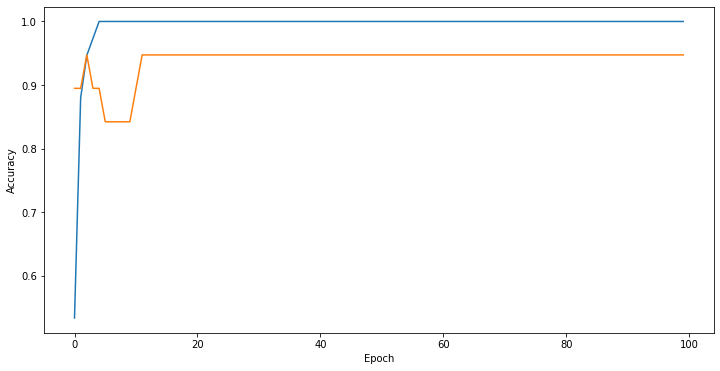

In [72]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")



plt.show()

In [73]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.2434 - accuracy: 0.8906 - auc: 0.9702


[0.24342787265777588, 0.890625, 0.9701856970787048]

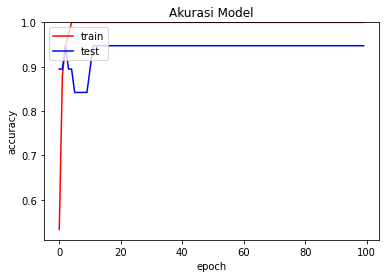

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.ylim(top=1)
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
result = model.predict(y)
for i in range(dfnorm.shape[0]):
    print("x=%s, Predicted=%s" % (y[i], result[i]))

x=[ 0.86043225 -0.60172167  0.22065873 -0.11853398  0.77100999  1.51578754
  0.48007914 -1.22904769  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116  0.26684209 -0.39151586
 -0.56273143  0.77198419 -0.43355498  0.77198419 -0.52363494  1.16542222
 -0.59196905 -0.68041382 -0.21530819 -0.16116459 -0.16116459 -0.07980869
 -0.07980869 -0.25993762 -0.13912167 -0.1132277  -0.16116459 -0.07980869
 -0.21530819 -0.07980869 -0.4940592   1.7175564  -0.07980869 -0.45398995
 -0.16116459 -0.1132277  -0.23094011 -0.55297841 -0.68041382  1.10695624
 -0.21530819  0.39151586 -0.31180478 -0.35856858  0.96271972 -0.76157731
 -0.52363494  1.06542721 -0.68041382 -0.71046598 -0.50395263  1.07906606], Predicted=[0.9996011]
x=[-1.05433248 -0.60172167  0.22065873 -0.11853398 -1.82089593 -0.72247818
 -1.16888835  1.05553508  0.72823653  0.13670441 -0.41983435 -0.41319094
 -0.82634619 -0.4630932   0.78979593  0.68700116 -0.44775198 -0.39151586
  1.77704663 -1.2953633

In [76]:
for i in range(6):
    if((result[i])>0.5):
        print('Butuh Penanganan')
    else:
        print('Tidak Perlu Penanganan')

Butuh Penanganan
Butuh Penanganan
Tidak Perlu Penanganan
Butuh Penanganan
Tidak Perlu Penanganan
Butuh Penanganan


#Save Model

In [78]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 108
drwxr-xr-x 2 root root  4096 May 25 12:06 assets
-rw-r--r-- 1 root root  9673 May 25 12:06 keras_metadata.pb
-rw-r--r-- 1 root root 89381 May 25 12:06 saved_model.pb
drwxr-xr-x 2 root root  4096 May 25 12:06 variables


In [82]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'mental-health-01.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

# with open('mental-health-labels-01', 'w') as f:
#     f.write('\n'.join(label_types))

In [83]:
try:
    files.download('mental-health-01.tflite')
    # files.download('mental-health-labels-01.txt')
except:
    pass

In [84]:
model.save("mental-health-01.h5")